<a href="https://colab.research.google.com/github/pankaj-beldar/patent-data-NLP-classification/blob/main/dendogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
X = pd.read_csv('/content/drive/MyDrive/Patent_paper/transformed_data.csv')
X

,Principal Component 1,Principal Component 2
0,-21.615439,3.791762
1,-10.257136,-8.897680
2,76.789586,50.674933
3,-19.747907,-4.547233
4,-16.638254,-3.970360
...,...,...
35201,77.153777,-11.972643
35202,29.586639,1.716125
35203,-17.077025,0.133703
35204,-20.047662,0.544990


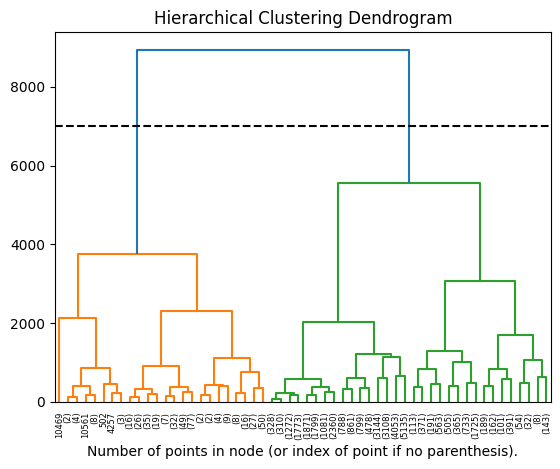

In [ ]:




from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)





# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y= 7000, color='black', linestyle='--')
plt.show()

In [ ]:
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y= 7000, color='black', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming your data is stored in X

# Create a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for cluster numbers from 2 to 10
for num_clusters in range(2, 11):
    agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agg_cluster.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {num_clusters} clusters: {silhouette_avg}")

# Find the optimal number of clusters with the highest silhouette score
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 to get the cluster number (index starts from 0)

print(f"Optimal Number of Clusters: {optimal_num_clusters}")


Silhouette Score for 2 clusters: 0.8965586803893292
Silhouette Score for 3 clusters: 0.6309814397258515
Silhouette Score for 4 clusters: 0.6318207249958235
Silhouette Score for 5 clusters: 0.5793375178007577
Silhouette Score for 6 clusters: 0.5800185177661196
Silhouette Score for 7 clusters: 0.5800905559313113
Silhouette Score for 8 clusters: 0.32120761520000857
Silhouette Score for 9 clusters: 0.3241037975850741
Silhouette Score for 10 clusters: 0.3195890671292663
Optimal Number of Clusters: 2


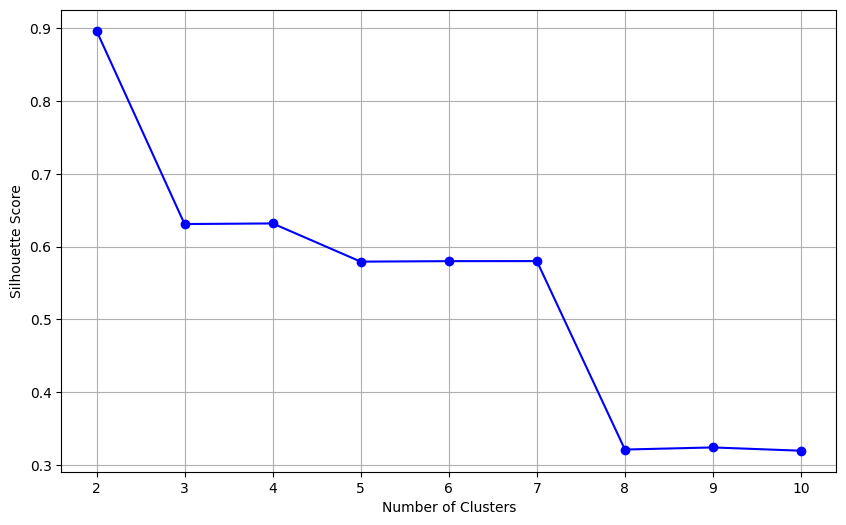

In [ ]:
import matplotlib.pyplot as plt

# Silhouette Scores and corresponding cluster numbers
silhouette_scores = [0.8965586803893292, 0.6309814397258515, 0.6318207249958235, 0.5793375178007577,
                     0.5800185177661196, 0.5800905559313113, 0.32120761520000857,
                     0.3241037975850741, 0.3195890671292663]
cluster_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_numbers, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
#plt.title('Silhouette Scores for Different Cluster Numbers')
plt.grid(True)
plt.show()
